# Lab 4: Linear Regression

In [35]:
# Import necessary python libraries

import numpy as np # For handling array operations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For figures and graphs
from tabulate import tabulate # For displaying information in tabular form
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## PART A : Prerequisites for linear regression implementation

1. Create  an  array  x  = \[1, 1, 2,  3,  4,  3,  4,  6,  4]  using  numpy.  Calculate  a  function h(x)=t0+t1*x, where t0=1.2 and t1=0.5, for all values of x and plot a graph with x on one axis and h(x)on another axis. 

---  ---  ---  ---  ---  ---  ---  ---  ---
1    1    2    3    4    3    4    6    4
1.7  1.7  2.2  2.7  3.2  2.7  3.2  4.2  3.2
---  ---  ---  ---  ---  ---  ---  ---  ---


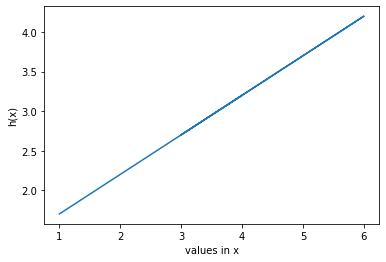

In [14]:
def h(x):
  t0 = 1.2
  t1 = 0.5
  return (t0 + t1*x)

x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
hx = h(x)

print(tabulate([x, hx]))

plt.plot(x, hx)
plt.xlabel('values in x')
plt.ylabel('h(x)')
plt.show()

2. Create two arrays A and B with the following values using numpy array. Let (Ai,Bi) represent a data point with i th element of A and B. A = \[1, 1, 2, 3, 4, 3, 4, 6, 4] B = [2, 1,  0.5,  1,  3,  3,  2,  5,  4]  Find  out  the  dot  product  of  the  vectors.  [Hint  use  numpy np.dot(a,b)]

In [17]:
A = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B = np.array([2, 1, 0.5, 1, 3, 3, 2, 5, 4])

np.dot(A, B)

82.0

3. Plot a graph marking the data points (Ai,Bi) with A on the X-axis and B on the Y-axis.

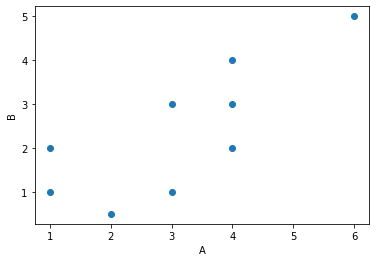

In [18]:
plt.scatter(A, B)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

4. Calculate Mean Square Error (MSE) of A and B.

In [19]:
mse = np.sum((a-b)**2) / len(a)
print('Mean Square Error =', mse)

Mean Square Error = 1.4722222222222223


5. Modify the above equation with the following cost function. Implement as a function with prototype **def compute_cost_function(n,t1,A,B)\:**. 
Take h(x) =t1*x and t1= 0.5 Modify the above code iterating for different values of t1 and calculate J(t1).Try with t1 =0.1,0.3,0.5,0.7,0.8. Plot a graph with t1 on X-axis and J(t1)  on  Y-axis.  \[hint  sum_squared_error  =  np.square(np.dot(features,  theta) -values).sum() cost = sum_squared_error / (2*m)]

-------  -------  --------  --------  --------
0.1      0.3      0.5       0.7       0.8
2.99611  1.65389  0.791667  0.409444  0.398333
-------  -------  --------  --------  --------


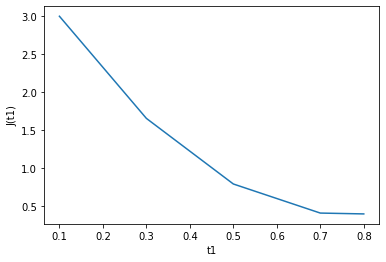

In [23]:
def compute_cost_function(n, t1, A, B):
    sum_squared_error = np.sum(np.square(np.dot(t1, A) - B))
    cost = sum_squared_error/(2*n)
    return cost

t1 = [0.1, 0.3, 0.5, 0.7, 0.8]
cost = []

# Finding the cost for different values of t1 (theta)
for t1_value in t1:
    cost.append(compute_cost_function(len(A), t1_value, A, B))
    
print(tabulate([t1, cost]))

# Plotting the cost for the corresponding value of theta
plt.plot(t1, cost)
plt.xlabel('t1')
plt.ylabel('J(t1)')
plt.show()

## PART B : Linear Regression Implementation (with one variable)

1. Generate a new data set from student scores with one feature studytime and output variable average grade = (G1+G2+G3)/3 

In [29]:
student_data  = pd.read_csv('datasets_student_mat.csv')
df = pd.DataFrame(list(zip(student_data['studytime'], (student_data['G1']+student_data['G2']+student_data['G3'])/3)), columns =['studytime', 'avg_grade'])
df.to_csv("./student_average_grade.csv", sep=',',index=False)

2. Load the new data set

In [30]:
data = pd.read_csv('student_average_grade.csv')
data.head()

,studytime,avg_grade
0,2,5.666667
1,2,5.333333
2,2,8.333333
3,3,14.666667
4,2,8.666667


3. Plot data

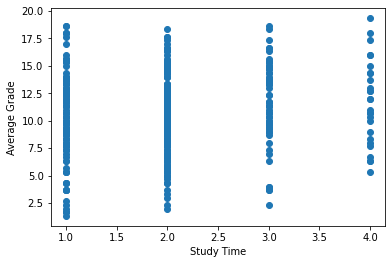

In [48]:
plt.scatter(data['studytime'], data['avg_grade'])
plt.xlabel('Study Time')
plt.ylabel('Average Grade')
plt.show()

4. Implement linear regression using inbuilt package python Scikit 

In [80]:
X = data[['studytime']]
y = data[['avg_grade']]

regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

5. Implement   gradient   descent   algorithm   with   the function   prototype   **def gradient_descent(alpha, x, y, max_iter=1500):** where alpha is the learning rate, x is the input feature vector. y is the target. Subject the feature vector to normalisation step if needed. Convergence criteria: when no: of iterations exceed max_iter. \[hint sum_squared_error = np.square(np.dot(features, theta) -values).sum() cost = sum_squared_error / (2*m)]

In [105]:
learned_params = []

def gradient_descent(alpha, x, y, max_iter=1500):
    theta = 0
    m = float(len(y))
    for i in range(max_iter):
        theta = theta - (alpha / m) * np.dot(x.T,(np.dot(x, theta) - y))
    learned_params.append(theta)

6. Vary learning rate from 0.1 to 0.9 and observe the learned parameter.

In [106]:
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for alpha in alpha_values:
    gradient_descent(alpha, X_train, y_train, 100)    

In [100]:
def gradientDescent(x, y, alpha, num_iter):
    theta = 0
    m = np.size(x,axis=0)
    for i in range(num_iter):
        theta = theta - (alpha / m) * np.dot(x.T,(np.dot(x, theta) - y))
    return theta

theta = gradientDescent(X_train, y_train, 0.01, 1500)
theta

array([[4.6484939]])